In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.datasets import load_diabetes
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
sns.set(rc={'figure.figsize':(10,8)})

# Linear Regression

## Prediction model: Linear Regression
$\hat{y} = ax + b$

## Cost function: Mean Squared Error(MSE)
###### MSE is a way to measure fitness of the linear model, but not the way to optimize the linear model
$MSE = \frac{1}{N}\sum\limits_{i=1}^{n}(y - \hat{y})^2 = 
\frac{1}{N}\sum\limits_{i=1}^{n}(y - (ax + b))^2$ <br>

## Optimization function: Gradient Descent Algorithm in MSE
###### Gradient Descent is used to calculate the gradient of the cost function, minimize the cost (value of cost function)
* if we visualise the cost function, it is a "U" curve for the MSE, because the MSE is very high if we initialise the equation is $\hat{y} = 0 + 3x$ or increase the value of intercept $\hat{y} = 999 + 3x$ <br>
* Therefore, we need to use derivative to find the minimum point point in cost function of intercept(b) and coef(a)
###### Derivative of intercept: $ \frac{d}{d b} = \frac{2}{n}\sum\limits_{i=1}^{n}[y - (b + ax)]*-1$
 * the result is the slope of intercept 
###### Derivative of coef: $ \frac{d}{d a} = \frac{2}{n}\sum\limits_{i=1}^{n}[y - (b + ax)]*-x$
 * the result is the slope of coef

###### Steps for intercept
1. Take the derivative of the cost function for intercept in it.
2. Pick a random values of intercept for the derivative, eg; 0
3. Calculate the derivative of intercept (slope of intercept)
4. Step size = slope * 0.1(learning rate)
5. New intercept = old intercept - step size
6. Repeat 2-4 until the slope = 0.009 / step size = 0.0009

###### Steps for coef
1. Take the derivative of the cost function for coef in it.
2. Pick a random values of coef for the derivative, eg; 1
3. calculate the derivative of coef (slope of coef)
4. Step size = slope * 0.1(learning rate)
5. New coef = old coef - step size
6. repeat 2-4 until the slope = 0.009 / step size = 0.0009

In [26]:
diabetes = load_diabetes()

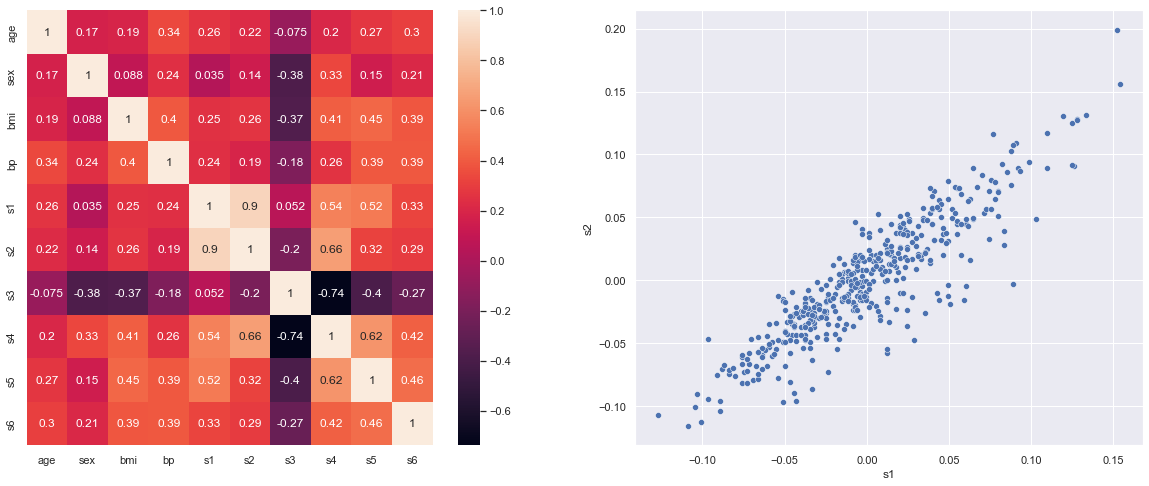

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
_ = sns.heatmap(df.corr(), annot=True, ax=axes[0])
_ = sns.scatterplot(x='s1', y='s2', data=df, ax=axes[1])

#### Feature Selection
##### From the heatmap aboved, one pair of the high correlation features are **s1** and **s2**. Therefore, this pair of feature will be selected for linear regression modeling.

### Prediction model: linear regression

In [124]:
def Linear_Regression(X, theta, b):
    y_hat = theta*X + b
    return y_hat

### Cost Function: MSE

In [125]:
def MSE(X, y, y_hat):
    n = X.shape[0]
    total_cost = np.sum((y - y_hat)**2)
    return total_cost/n

### Derivative of cost function(MSE)

In [139]:
def Derivative(X, y, theta, b):
    n = X.shape[0]
    
    deriv_theta = (2/n) * np.sum(((theta*X + b) - y) * X)
    deriv_b = (2/n) * np.sum((theta*X + b) - y)
    return deriv_theta, deriv_b

### Gradient Descent Algorithm
Remark: Since the data range are similar which are around (-0.1 - 0.2), normalization is skiped.

In [63]:
m = 0
c = 0
X = np.array(df['s1'])
y = np.array(df['s2'])

learning_rate = 0.01
m = X.shape[0]

# record only
Deriv_m = 0
Deriv_c = 0
step_size_m = 0
step_size_c = 0

run_count = 0